In [1]:
ticker = "KORI.PA"

In [2]:
# Parameters
ticker = "CSU"


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import os

from newsapi import NewsApiClient
import config
import datetime

stock = yf.Ticker(ticker)
dax = yf.Ticker("^GDAXI")
sp = yf.Ticker("^GSPC")

#### stock history values
history_5y = stock.history(period='5y')['Close']
history_1y = stock.history(period='1y')['Close']
history_since_corona = history_1y[history_1y.index >= '2020-02-20']

dax_5y = dax.history(period='5y')['Close']
dax_1y = dax.history(period='1y')['Close']
sp_5y = sp.history(period='5y')['Close']
sp_1y = sp.history(period='1y')['Close']


def get_stock_info(label):
    try:
        value = stock.info[label]
    except:
        value = None
    return value

#### df values: "name", "symbol", "sector", "industry", "country", "business_summary", "ret_since_corona", "ret_1y", "ret_5y", "ret_1y_wo_corona", "ret_5y_wo_corona", "perc_diff_dax_1y_wo_corona", "perc_diff_dax_5y_wo_corona", "perc_diff_sp_1y_wo_corona", "perc_diff_sp_5y_wo_corona"
name = get_stock_info("longName")
symbol = get_stock_info("symbol")
sector = get_stock_info("sector")
industry = get_stock_info("industry")
country = get_stock_info("country")
business_summary = get_stock_info("longBusinessSummary")

ret_since_corona = history_since_corona.pct_change().sum()
ret_1y = history_1y.pct_change().sum()
ret_5y = history_5y.pct_change().sum()
ret_1y_wo_corona = history_1y[history_1y.index <= '2020-02-21'].pct_change().sum()
ret_5y_wo_corona = history_5y[history_5y.index <= '2020-02-21'].pct_change().sum()

dax_1y_wo_corona = dax_1y[dax_1y.index <= '2020-02-21'].pct_change().sum()
dax_5y_wo_corona = dax_5y[dax_5y.index <= '2020-02-21'].pct_change().sum()
sp_1y_wo_corona = sp_1y[sp_1y.index <= '2020-02-21'].pct_change().sum()
sp_5y_wo_corona = sp_5y[sp_5y.index <= '2020-02-21'].pct_change().sum()

perc_diff_dax_1y_wo_corona = ret_1y_wo_corona - dax_1y_wo_corona
perc_diff_dax_5y_wo_corona = ret_5y_wo_corona - dax_5y_wo_corona
perc_diff_sp_1y_wo_corona = ret_1y_wo_corona - sp_1y_wo_corona
perc_diff_sp_5y_wo_corona = ret_5y_wo_corona - sp_5y_wo_corona


if os.path.isfile('stock_returns.pkl'):
    # load existing pickle
    df = pd.read_pickle("stock_returns.pkl")
    # check if stock in pickle already, if not, add stock
else:
    # create new dataframe (only do once)
    df = pd.DataFrame(columns=["name", "symbol", "sector", "industry", "country", "business_summary", "ret_since_corona", "ret_1y", "ret_5y", "ret_1y_wo_corona", "ret_5y_wo_corona", "perc_diff_dax_1y_wo_corona", "perc_diff_dax_5y_wo_corona", "perc_diff_sp_1y_wo_corona", "perc_diff_sp_5y_wo_corona"])

if sum(symbol == df.symbol) == 0:
    df.loc[len(df)] = [name, symbol, sector, industry, country, business_summary, ret_since_corona, ret_1y, ret_5y, ret_1y_wo_corona, ret_5y_wo_corona, perc_diff_dax_1y_wo_corona, perc_diff_dax_5y_wo_corona, perc_diff_sp_1y_wo_corona, perc_diff_sp_5y_wo_corona]
    df.to_pickle("stock_returns.pkl")

# Company info 

In [4]:
print(f"""
Company name: {name}
Symbol: {symbol}
Sector: {sector}
Industry: {industry}
Country: {country}\n
Business summary: {business_summary}
""")


Company name: Capital Senior Living Corporation
Symbol: CSU
Sector: Healthcare
Industry: Medical Care Facilities
Country: United States

Business summary: Capital Senior Living Corporation develops, owns, operates, and manages senior housing communities in the United States. The company provides senior living services to the elderly, including independent living, assisted living, and memory care services. Its independent living services comprise daily meals, transportation, social and recreational activities, laundry, housekeeping, and 24-hour staffing; and access to health screenings, periodic special services, and dietary and similar programs, as well as exercise and fitness classes. The company's assisted living services consist of personal care services, such as assistance with activities of daily living (ADLs), including ambulation, bathing, dressing, eating, grooming, personal hygiene, and monitoring or assistance with medications; support services comprising meals, assistance w

# Performance

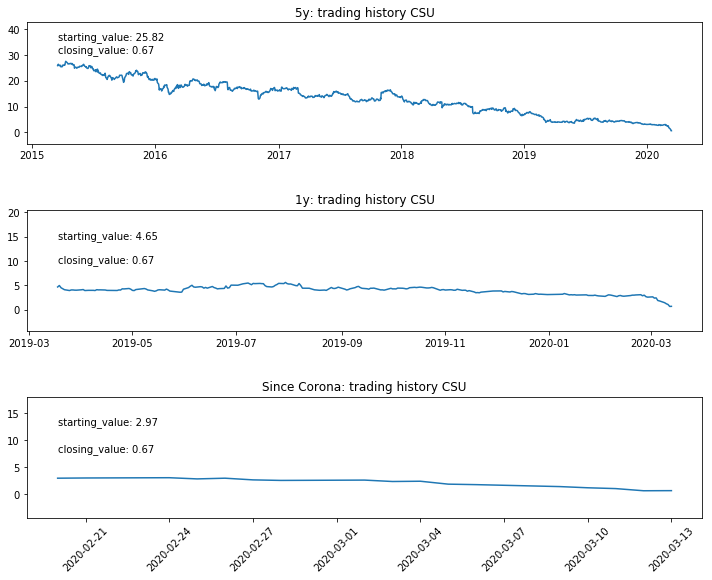

1y:              percent return: -156.46%
Since Corona:    percent return: -129.72%

5y percent return before 21.02.20: -160.28%. Diff to dax: -178.76%
1y percent return before 21.02.20: -25.40%. Diff to dax: -41.57%


In [5]:
# Create 2x2 sub plots
gs = gridspec.GridSpec(4, 1)

plt.figure(figsize = (10,10))

plt.subplot(gs[0, 0])
plt.plot(history_5y)
plt.title(f"5y: trading history {stock.info['symbol']}")
plt.text(history_5y.index[0], history_5y[0]+10, f"starting_value: {history_5y[0]}")
plt.text(history_5y.index[0], history_5y[0]+5, f"closing_value: {history_5y[-1]}")
plt.ylim(min(history_5y)-5, max(history_5y)+15)

plt.subplot(gs[1, 0])
plt.plot(history_1y)
plt.title(f"1y: trading history {stock.info['symbol']}")
plt.text(history_1y.index[0], history_1y[0]+10, f"starting_value: {history_1y[0]}")
plt.text(history_1y.index[0], history_1y[0]+5, f"closing_value: {history_1y[-1]}")
plt.ylim(min(history_1y)-5, max(history_1y)+15)

plt.subplot(gs[2, 0])
plt.plot(history_since_corona)
plt.title(f"Since Corona: trading history {stock.info['symbol']}")
plt.text(history_since_corona.index[0], history_since_corona[0]+10, f"starting_value: {history_since_corona[0]}")
plt.text(history_since_corona.index[0], history_since_corona[0]+5, f"closing_value: {history_since_corona[-1]}")
plt.ylim(min(history_since_corona)-5, max(history_since_corona)+15)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

## calc returns
print(f"1y:              percent return: {ret_1y:.2%}")
print(f"Since Corona:    percent return: {ret_since_corona:.2%}\n")

## calc returns w/o Corona & compare with DAX
print(f"5y percent return before 21.02.20: {ret_5y_wo_corona:.2%}. Diff to dax: {perc_diff_dax_5y_wo_corona:.2%}")
print(f"1y percent return before 21.02.20: {ret_1y_wo_corona:.2%}. Diff to dax: {perc_diff_dax_1y_wo_corona:.2%}")

# News cycle

In [6]:
# init api
api = config.API_NEWS
newsapi = NewsApiClient(api_key=api)

# name already set above
name = name
# define date range - as start date take minus 28 days to always stay within api limit (apparently 1 month)
current_date = datetime.datetime.now().date()
date_28_days_ago = current_date - datetime.timedelta(days=28)


# split name into word elements and loop through name until first hit
name_split = name.split(' ')
counter = 0
for i in name_split:
    # join words to current state of loop (e.g. ['Capital', 'Senior', 'Living'] to 'Capital Senior Living')
    query_word = ' '.join(name_split[0 : len(name_split) - counter])
    
    # get articles, first 20 (page 1) and sorted by publication date
    headlines = newsapi.get_everything(q=query_word
                                           , sources='reuters, google-news, bloomberg, financial-post, handelsblatt, google-news-fr, le-monde, lequipe, les-echos, liberation'
                                           , from_param=date_28_days_ago
                                           , to=current_date
                                          # , language='en'
                                           , sort_by='publishedAt'
                                           , page=1
                                             )

    # if any results, print and break loop
    total_results = headlines['totalResults']
    if total_results > 0:
        print(f"total results: {total_results}\n\n")
        for i in range(len(headlines['articles'])):
            print(f"{headlines['articles'][i]['publishedAt']}")
            print(f"  {headlines['articles'][i]['title']}")
            print(f"  {headlines['articles'][i]['source']['name']}")
            print(f"  {headlines['articles'][i]['url']}\n")
        break
    counter += 1
    if counter == len(name_split) and total_results == 0:
        print(f"no news since {date_28_days_ago}")


total results: 12


2020-03-11T17:37:04Z
  In change, U.S. describes East Jerusalem Palestinians as 'Arab residents'
  Reuters
  https://www.reuters.com/article/us-usa-rights-israel-palestinians-idUSKBN20Y2VW

2020-03-02T12:17:51Z
  Broken Health: The medical crisis that’s aggravating Iraq’s unrest
  Reuters
  https://www.reuters.com/article/us-iraq-health-specialreport-idUSKBN20P1QB

2020-02-29T05:57:11Z
  Afghans hope for peace as U.S.-Taliban gear up for troop withdrawal deal
  Reuters
  https://uk.reuters.com/article/uk-usa-afghanistan-taliban-idUKKBN20N06Z

2020-02-29T05:35:49Z
  Afghans hope for peace as U.S.-Taliban gear up for troop withdrawal deal
  Reuters
  https://www.reuters.com/article/us-usa-afghanistan-taliban-idUSKBN20N06R

2020-02-29T05:35:49Z
  Afghans hope for peace as U.S.-Taliban gear up for troop withdrawal deal
  Reuters
  https://ca.reuters.com/article/topNews/idCAKBN20N06R

2020-02-29T05:18:52Z
  Afghans hope for peace as U.S.-Taliban gear up for troop withdra